In [86]:
from sklearn.preprocessing import StandardScaler

In [87]:
#pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [88]:
#pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [89]:
#nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abhim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('C:\\Users\\abhim\\OneDrive\\Desktop\\PRAXIS DATA SCIENCE\\SEM 2\\NLP\\data\\SMSSpamCollection.csv')

In [6]:
df.head()

,Class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
## 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Class   5572 non-null   object
 1   sms     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
## we can clean the data , but we will do it later
## we need to use reg ex 

In [9]:
df['sms']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: sms, Length: 5572, dtype: object

In [10]:
## lower the case of letters
df['sms'] = df['sms'].apply(lambda x: str(x).lower())

In [7]:
## remove the stopped words
import nltk
from nltk.corpus import stopwords

In [8]:
# create a function to remove words
stop_words = stopwords.words('english')
def remove_stopwords(txt):
    txt = ' '.join(word for word in txt.split(' ') if word not in stop_words)
    return txt
df['sms'] = df['sms'].apply(remove_stopwords)

In [9]:
df['sms'][0]

'go jurong point, crazy.. available bugis n great world la e buffet... cine got amore wat...'

In [10]:
## encode the class
df['Class'] = df['Class'].replace({'spam':1,'ham':0})

## WordCloud

In [11]:
from wordcloud import WordCloud

In [12]:
msgs = ''
for msg in df['sms']:
    msg = msg.split(' ')
    for words in msg:
        msgs = msgs+words+' '

In [13]:
msgs

'go jurong point, crazy.. available bugis n great world la e buffet... cine got amore wat... ok lar... joking wif u oni... free entry 2 wkly comp win fa cup final tkts 21st may 2005. text fa 87121 receive entry question(std txt rate)t&c\'s apply 08452810075over18\'s u dun say early hor... u c already say... nah think goes usf, lives around though freemsg hey darling 3 week\'s word back! i\'d like fun still? tb ok! xxx std chgs send, £1.50 rcv even brother like speak me. treat like aids patent. per request \'melle melle (oru minnaminunginte nurungu vettam)\' set callertune callers. press *9 copy friends callertune winner!! valued network customer selected receivea £900 prize reward! claim call 09061701461. claim code kl341. valid 12 hours only. mobile 11 months more? u r entitled update latest colour mobiles camera free! call mobile update co free 08002986030 i\'m gonna home soon want talk stuff anymore tonight, k? i\'ve cried enough today. six chances win cash! 100 20,000 pounds txt> c

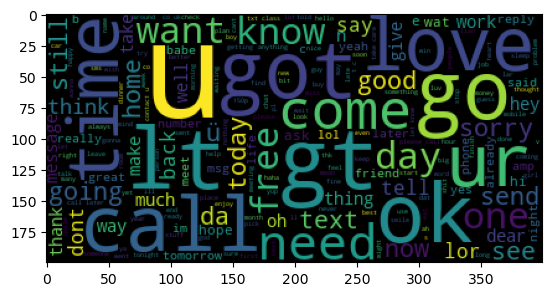

In [14]:
## visualize
wcloud = WordCloud().generate(msgs)
plt.imshow(wcloud)
plt.show()

#### code for texts only in ham 

In [15]:
msgs_class0 = ''
for msg in df[df['Class']==0]['sms']:
    msg = msg.split(' ')
    for words in msg:
        msgs_class0 = msgs_class0+words+' '

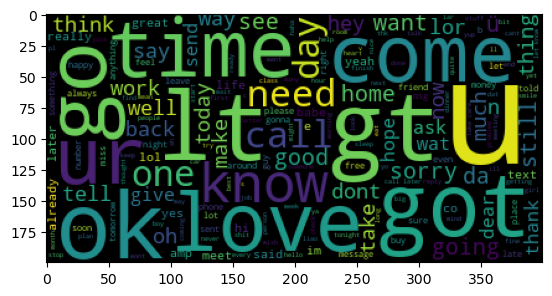

In [16]:
## visualize
wcloud = WordCloud().generate(msgs_class0)
plt.imshow(wcloud)
plt.show()

In [17]:
## plot both together

### code for spam msgs

In [18]:
msgs_class1 = ''
for msg in df[df['Class']==1]['sms']:
    msg = msg.split(' ')
    for words in msg:
        msgs_class1 = msgs_class1+words+' '

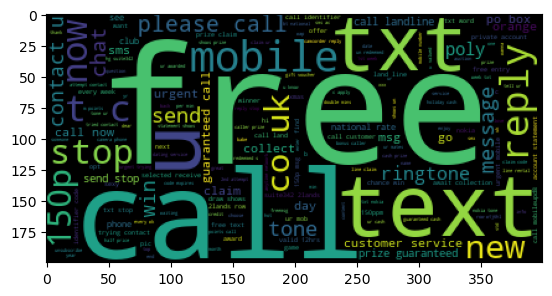

In [19]:
## visualize
wcloud1 = WordCloud().generate(msgs_class1)
plt.imshow(wcloud1)
plt.show()

## Predict Spam

In [20]:
## Count Vectorizer
#### Look for unique words and 

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [22]:
y = df['Class']
X = df.sms

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 42)

In [24]:
## call count vectorizer
cvect = CountVectorizer()
## learning how much inp should give to words spam or ham

## train the cvect to fit the X_train will learn the feature from X_train 
## transform the X_train 
X_traint = cvect.fit_transform(X_train)
X_testt = cvect.transform(X_test)

In [25]:
### test means sms can contain new words , but it will ignore these new words 
### new words will not be created as features only the word used in the train dataset will take as features in the test dataset

In [26]:
type(X_traint)

scipy.sparse._csr.csr_matrix

In [27]:
cvect.vocabulary_

{'quite': 5182,
 'late': 3744,
 'lar': 3738,
 'ard': 969,
 '12': 260,
 'anyway': 931,
 'wun': 7135,
 'drivin': 2277,
 'tuesday': 6599,
 'night': 4459,
 'real': 5246,
 'go': 2942,
 'chase': 1606,
 'run': 5479,
 'crossing': 1933,
 'street': 6088,
 'says': 5552,
 'never': 4436,
 'answer': 909,
 'texts': 6339,
 'confirm': 1812,
 'deny': 2085,
 'still': 6062,
 'work': 7092,
 'going': 2953,
 'on': 4607,
 'it': 3487,
 'small': 5846,
 'house': 3264,
 'think': 6383,
 'could': 1880,
 'stop': 6072,
 'like': 3826,
 'hour': 3261,
 'so': 5881,
 'roommate': 5447,
 'looking': 3907,
 'stock': 6063,
 'trip': 6569,
 'lol': 3893,
 'great': 3010,
 'im': 3352,
 'getting': 2905,
 'hungry': 3298,
 'would': 7109,
 'good': 2965,
 'll': 3870,
 'phone': 4849,
 'tomo': 6491,
 'lunchtime': 3968,
 'shall': 5679,
 'organise': 4663,
 'something': 5902,
 'yesterday': 7186,
 'true': 6578,
 'ya': 7159,
 'nice': 4452,
 'be': 1166,
 'ready': 5245,
 'thursday': 6420,
 'hi': 3178,
 'way': 6922,
 '2day': 361,
 'normal': 4499,

In [29]:
## column no. 5182 is quite 
## index of columns 
# key is column name , 
# value is index of column

In [32]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve


In [35]:
## fit the transform data
mnb = MultinomialNB()
mnb.fit(X_traint,y_train)

MultinomialNB()

In [36]:
## predicted class
y_train_pred = mnb.predict(X_traint)

In [37]:
## prob of prediction
y_train_prob = mnb.predict_proba(X_traint)

In [ ]:
##

In [46]:
y_train_prob[:,1]

array([2.57620023e-07, 6.72006314e-03, 4.83037968e-03, ...,
       1.25726779e-04, 2.05309467e-04, 4.96873681e-04])

In [90]:
y_train

708     0
4338    0
5029    0
4921    0
2592    0
       ..
3772    0
5191    0
5226    0
5390    0
860     0
Name: Class, Length: 3900, dtype: int64

In [45]:
## confusion matrix
print('confusion matrix -Train: ','\n', confusion_matrix(y_train,y_train_pred))
print('Accuracy score -Train: ','\n', accuracy_score(y_train,y_train_pred))
print('Auc score: ', '\n', roc_auc_score(y_train,y_train_prob[:,1]))

confusion matrix -Train:  
 [[3366   11]
 [  11  512]]
Accuracy score -Train:  
 0.9943589743589744
Auc score:  
 0.9974056872182819


In [49]:
## predicted class
y_test_pred = mnb.predict(X_testt)

## prob of prediction
y_test_prob = mnb.predict_proba(X_testt)

##

y_test_prob[:,1]
## confusion matrix
print('confusion matrix -Test: ','\n', confusion_matrix(y_test,y_test_pred))
print('Accuracy score -Test: ','\n', accuracy_score(y_test,y_test_pred))
print('Auc score: ', '\n', roc_auc_score(y_test,y_test_prob[:,1]))

confusion matrix -Test:  
 [[1438   10]
 [  12  212]]
Accuracy score -Test:  
 0.9868421052631579
Auc score:  
 0.9857808800315707


### Draw Roc curve

In [51]:
Fpr, Tpr, threshold = roc_curve(y_test,y_test_prob[:,1])

In [ ]:
### make a df of the above

In [73]:
threshold[0] = threshold[0]-1

In [74]:
roc_df = pd.DataFrame({'Fpr':Fpr, 'Tpr':Tpr, 'threshold':threshold})

In [75]:
roc_df.head()

,Fpr,Tpr,threshold
0,0.0,0.000000,1.0
1,0.0,0.343750,1.0
2,0.0,0.370536,1.0
3,0.0,0.375000,1.0
4,0.0,0.388393,1.0


In [76]:
roc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Fpr        130 non-null    float64
 1   Tpr        130 non-null    float64
 2   threshold  130 non-null    float64
dtypes: float64(3)
memory usage: 3.2 KB


In [77]:
roc_df.iloc[80:90,:]

,Fpr,Tpr,threshold
80,0.279696,0.982143,0.001954
81,0.308011,0.982143,0.001287
82,0.309392,0.982143,0.001282
83,0.312845,0.982143,0.001195
84,0.314227,0.982143,0.001183
85,0.321133,0.982143,0.001010
86,0.322514,0.982143,0.001004
87,0.328729,0.982143,0.000908
88,0.330110,0.982143,0.000898
89,0.390193,0.982143,0.000380


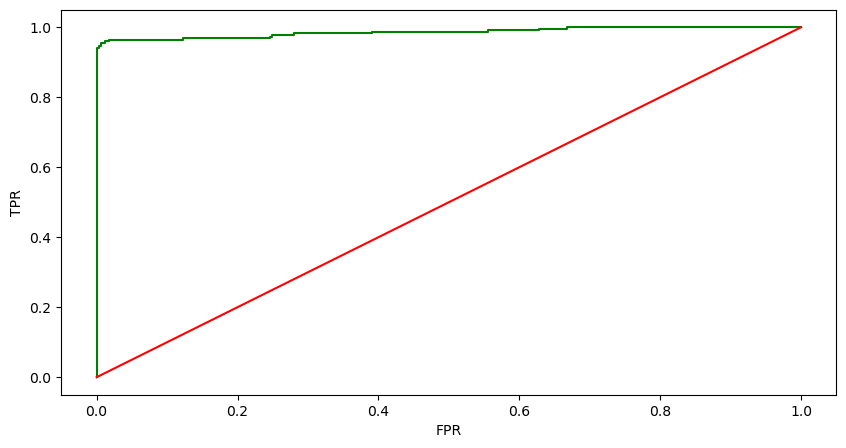

In [78]:
plt.figure(figsize=(10,5))
plt.plot(Fpr,Tpr,'g')
plt.plot(Fpr,Fpr,'r')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [79]:
## plot threshold

In [80]:
## threshold max value is showing 2
threshold

array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 9.99999436e-01, 9.99999432e-01,
       9.99998023e-01, 9.99997723e-01, 9.99992707e-01, 9.99992643e-01,
       9.86298408e-01, 9.81585770e-01, 9.14879924e-01, 7.40094085e-01,
       6.75109965e-01, 5.69896857e-01, 5.63932397e-01, 5.02566467e-01,
       4.33139396e-01, 2.82447558e-01, 2.78872626e-01, 1.91053582e-01,
       1.87477439e-01, 1.50277878e-01, 1.42093333e-01, 1.35158980e-01,
       1.34102564e-01, 9.98541397e-02, 9.94387500e-02, 8.15687730e-02,
       8.13601905e-02, 7.04722876e-02, 7.04366520e-02, 6.35832126e-02,
       6.21346883e-02, 5.83007563e-02, 5.59761603e-02, 4.95080950e-02,
       4.81712024e-02, 3.60014528e-02, 3.54996077e-02, 2.92338226e-02,
       2.92338226e-02, 2.30726613e-02, 2.19981324e-02, 2.04136420e-02,
      

In [81]:
## change in above code 
change threshold[0] to  threshold[0]-1

SyntaxError: invalid syntax (1960046379.py, line 2)

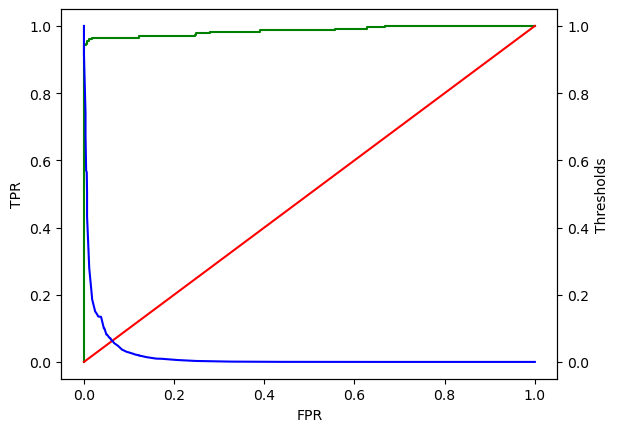

In [82]:
fig,ax = plt.subplots()
ax.plot(Fpr,Tpr,'g')
ax.plot(Fpr,Fpr,'r')
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')
ax2 = ax.twinx()
ax2.plot(Fpr,threshold,'b')
ax2.set_ylabel('Thresholds')
plt.show()

### Predict spam TF*IDF


In [85]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf = TfidfTransformer()
X_train_tfidf = tfidf.fit_transform(X_traint)
X_test_tfidf = tfidf.fit_transform(X_testt)

confusion matrix -Train:  
 [[3377    0]
 [  77  446]]
Accuracy score -Train:  
 0.9802564102564103
Auc score:  
 0.9976372616241576
confusion matrix -Test:  
 [[1448    0]
 [  44  180]]
Accuracy score -Test:  
 0.9736842105263158
Auc score:  
 0.9852444258089976
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Fpr        122 non-null    float64
 1   Tpr        122 non-null    float64
 2   threshold  122 non-null    float64
dtypes: float64(3)
memory usage: 3.0 KB


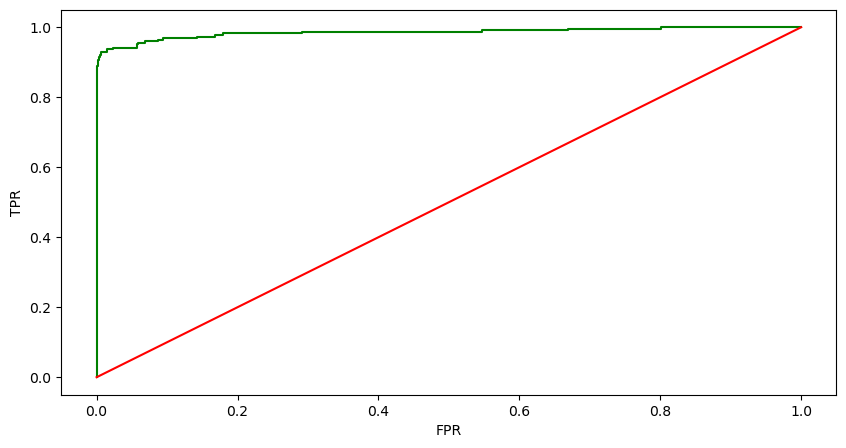

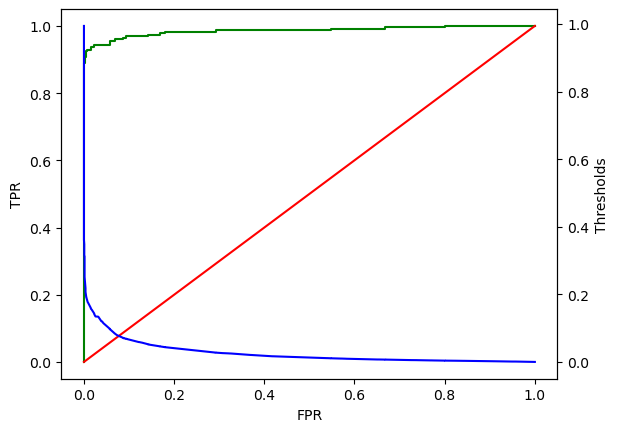

In [89]:
## fit the transform data
mnb = MultinomialNB()
mnb.fit(X_train_tfidf,y_train)

## predicted class
y_train_pred = mnb.predict(X_train_tfidf)

## prob of prediction
y_train_prob = mnb.predict_proba(X_train_tfidf)

##

y_train_prob[:,1]

## confusion matrix
print('confusion matrix -Train: ','\n', confusion_matrix(y_train,y_train_pred))
print('Accuracy score -Train: ','\n', accuracy_score(y_train,y_train_pred))
print('Auc score: ', '\n', roc_auc_score(y_train,y_train_prob[:,1]))

## predicted class
y_test_pred = mnb.predict(X_test_tfidf)

## prob of prediction
y_test_prob = mnb.predict_proba(X_test_tfidf)

##

y_test_prob[:,1]
## confusion matrix
print('confusion matrix -Test: ','\n', confusion_matrix(y_test,y_test_pred))
print('Accuracy score -Test: ','\n', accuracy_score(y_test,y_test_pred))
print('Auc score: ', '\n', roc_auc_score(y_test,y_test_prob[:,1]))

### Draw Roc curve

Fpr, Tpr, threshold = roc_curve(y_test,y_test_prob[:,1])

### make a df of the above

threshold[0] = threshold[0]-1

roc_df = pd.DataFrame({'Fpr':Fpr, 'Tpr':Tpr, 'threshold':threshold})

roc_df.head()

roc_df.info()

roc_df.iloc[80:90,:]

plt.figure(figsize=(10,5))
plt.plot(Fpr,Tpr,'g')
plt.plot(Fpr,Fpr,'r')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

## plot threshold

## threshold max value is showing 2
threshold

## change in above code 
#change threshold[0] to  threshold[0]-1

fig,ax = plt.subplots()
ax.plot(Fpr,Tpr,'g')
ax.plot(Fpr,Fpr,'r')
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')
ax2 = ax.twinx()
ax2.plot(Fpr,threshold,'b')
ax2.set_ylabel('Thresholds')
plt.show()